# DAT405/DIT407 Introduction to Data Science and AI 
## 2022-2023, Reading Period 4
## Assignment 4: Spam classification using Naïve Bayes 
The exercise takes place in this notebook environment.
Hints:
You can execute certain linux shell commands by prefixing the command with `!`. You can insert Markdown cells and code cells. The first you can use for documenting and explaining your results the second you can use writing code snippets that execute the tasks required.  

In this assignment you will implement a Naïve Bayes classifier in Python that will classify emails into spam and non-spam (“ham”) classes.  Your program should be able to train on a given set of spam and “ham” datasets. 
You will work with the datasets available at https://spamassassin.apache.org/old/publiccorpus/. There are three types of files in this location: 
-	easy-ham: non-spam messages typically quite easy to differentiate from spam messages. 
-	hard-ham: non-spam messages more difficult to differentiate 
-	spam: spam messages 

**Execute the cell below to download and extract the data into the environment of the notebook -- it will take a few seconds.** If you chose to use Jupyter notebooks you will have to run the commands in the cell below on your local computer, with Windows you can use 
7zip (https://www.7-zip.org/download.html) to decompress the data.

**What to submit:** 
Convert the notebook to a pdf-file and submit it. Make sure all cells are executed so all your code and its results are included. Double check the pdf displays correctly before you submit it.

In [2]:
#Download and extract data
!wget https://spamassassin.apache.org/old/publiccorpus/20021010_easy_ham.tar.bz2
!wget https://spamassassin.apache.org/old/publiccorpus/20021010_hard_ham.tar.bz2
!wget https://spamassassin.apache.org/old/publiccorpus/20021010_spam.tar.bz2
!tar -xjf 20021010_easy_ham.tar.bz2
!tar -xjf 20021010_hard_ham.tar.bz2
!tar -xjf 20021010_spam.tar.bz2

--2023-04-24 08:20:52--  https://spamassassin.apache.org/old/publiccorpus/20021010_easy_ham.tar.bz2
Resolving spamassassin.apache.org (spamassassin.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to spamassassin.apache.org (spamassassin.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1677144 (1,6M) [application/x-bzip2]
Saving to: ‘20021010_easy_ham.tar.bz2.1’

20021010_easy_ham.t 100%[===================>]   1,60M  --.-KB/s    in 0,08s   

2023-04-24 08:20:52 (19,2 MB/s) - ‘20021010_easy_ham.tar.bz2.1’ saved [1677144/1677144]

--2023-04-24 08:20:52--  https://spamassassin.apache.org/old/publiccorpus/20021010_hard_ham.tar.bz2
Resolving spamassassin.apache.org (spamassassin.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to spamassassin.apache.org (spamassassin.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1021126 (997K) [application/x-bzip2]
Saving to: ‘20021010_har

*The* data is now in the three folders `easy_ham`, `hard_ham`, and `spam`.

In [3]:
!ls -lah

total 7,8M
drwxrwxr-x 5 hannes hannes 4,0K Apr 24 08:20 .
drwxrwxr-x 8 hannes hannes 4,0K Apr 23 12:24 ..
-rw-rw-r-- 1 hannes hannes 1,6M Jun 29  2004 20021010_easy_ham.tar.bz2
-rw-rw-r-- 1 hannes hannes 1,6M Jun 29  2004 20021010_easy_ham.tar.bz2.1
-rw-rw-r-- 1 hannes hannes 998K Dec 16  2004 20021010_hard_ham.tar.bz2
-rw-rw-r-- 1 hannes hannes 998K Dec 16  2004 20021010_hard_ham.tar.bz2.1
-rw-rw-r-- 1 hannes hannes 1,2M Jun 29  2004 20021010_spam.tar.bz2
-rw-rw-r-- 1 hannes hannes 1,2M Jun 29  2004 20021010_spam.tar.bz2.1
drwx--x--x 2 hannes hannes 180K Oct 10  2002 easy_ham
drwx--x--x 2 hannes hannes  20K Dec 16  2004 hard_ham
-rw-rw-r-- 1 hannes hannes  26K Apr 24 08:20 IDSAI_Assignment4_SP4_22-23.ipynb
-rw-rw-r-- 1 hannes hannes 7,5K Apr 23 12:29 na‹ve_bayes_intro.ipynb
-rw-rw-r-- 1 hannes hannes  11K Apr 23 12:29 probability_intro.ipynb
drwxr-xr-x 2 hannes hannes  36K Oct 10  2002 spam


### 1. Preprocessing: 

##### 1.1 Look at a few emails from easy_ham, hard_ham and spam. Do you think you would be able to classify the emails just by inspection? How do you think a succesful model can learn the difference between the different classes of emails?


In [3]:
# Fetching text from a file path and removing the header info
def fetch_format(path):
   with open(path, 'r', encoding='latin1') as f:
      split = f.read().split('\n\n', 1)
   if len(split) == 1:
      return split[0]
   return split[1]

In [4]:
# Write your code for here for looking a few emails
import os, random

ham = random.choice(os.listdir("./easy_ham/"))
spam = random.choice(os.listdir("./spam/"))

#print(fetch_format(f"./spam/{spam}"))
print(fetch_format(f"./easy_ham/{ham}"))

URL: http://www.newsisfree.com/click/-1,8391026,1440/
Date: Not supplied

Campaigners say this and other mega-projects renege on promises made by African 
leaders at the World Summit in Johannesburg





Answer 1.1:
It seems feasible to classify the emails only from inspection. It seems like a lot of spam mails contains words like "invest", "click" and "100%" etcetera. To create a model for this we could generate some statistics on which words often appear in spam mails but seldom in ham mails. Then we would know which words to look for. Looking through a mail we could generate a score based on how many of these words appear and taking into account how statistically probable they are to be in a spam mail. Another thing to look for is HTML tags. It seems a lot of spam mails contains HTML whereas ham mails doesn't. Simply looking for HTML-tags would suffice for this since that is needed for any HTML to work. 

##### 1.2 Note that the email files contain a lot of extra information, besides the actual message. Ignore that for now and run on the entire text (in the optional part further down can experiment with filtering out the headers and footers). We don’t want to train and test on the same data (it might help to reflect on why if you don't recall). Split the spam and the ham datasets in a training set and a test set. (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`). Use only the easy_ham part as ham data for quesions 1 and 2.

In [5]:
# Write your code for here for splitting the data
import pandas as pd
from sklearn.model_selection import train_test_split

ham_paths = os.listdir("./easy_ham/")
spam_paths = os.listdir("./spam/")

ham = [fetch_format(f"./easy_ham/{x}") for x in ham_paths]
hamlabels = [0 for x in ham_paths]
spam = [fetch_format(f"./spam/{x}") for x in spam_paths]
spamlabels = [1 for x in spam_paths]

# Create dataframes for ham and spam with labels "content" "label"
df_ham = pd.DataFrame(list(zip(ham, hamlabels)), columns=["content", "label"])
df_spam = pd.DataFrame(list(zip(spam, spamlabels)), columns=["content", "label"])

# Create one big dataframe for both ham and spam
df = df_ham.append(df_spam)
df = df.sample(frac=1).reset_index(drop=True)

# Split data into test and train
X_train, X_test, y_train, y_test = train_test_split(df["content"], df["label"], test_size=0.3) 


### 2.1 Write a Python program that: 
1.	Uses the four datasets from Question 1 (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`) 
2.	Trains a Naïve Bayes classifier (use the [scikit-learn library](https://scikit-learn.org/stable/)) on `hamtrain` and `spamtrain`, that classifies the test sets and reports True Positive and False Negative rates on the `hamtest` and `spamtest` datasets. Use `CountVectorizer` ([Documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)) to transform the email texts into vectors. Please note that there are different types of Naïve Bayes Classifier in scikit-learn ([Documentation here](https://scikit-learn.org/stable/modules/naive_bayes.html)). Test two of these classifiers that are well suited for this problem:
- Multinomial Naive Bayes  
- Bernoulli Naive Bayes. 

Please inspect the documentation to ensure input to the classifiers is appropriate before you start coding. 



Accuracy: 0.9650655021834061


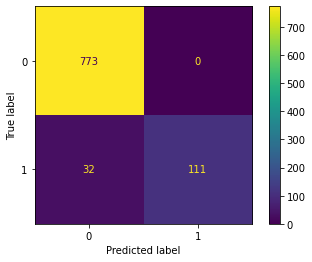

In [6]:
# Write your code here
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

nb = MultinomialNB()

# Convert strings to word count
vectorizer = CountVectorizer()
vX_train = vectorizer.fit_transform(X_train)
vX_test = vectorizer.transform(X_test)

nb.fit(vX_train.toarray(), y_train)
y_pred = nb.predict(vX_test.toarray())
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

cm = confusion_matrix(y_test, y_pred)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp_cm.plot()

Accuracy: 0.8995633187772926


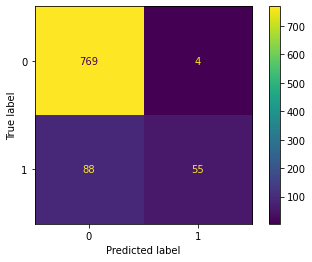

In [8]:
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()

vectorizer = CountVectorizer()
vX_train = vectorizer.fit_transform(X_train)
vX_test = vectorizer.transform(X_test)

nb.fit(vX_train.toarray(), y_train)
y_pred = nb.predict(vX_test.toarray())
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

cm = confusion_matrix(y_test, y_pred)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp_cm.plot()

### 2.2 Answer the following questions:
##### a) What does the CountVectorizer do?
Answer 2.2.a

CountVectorizer converts the contents of the emails (Strings) to a matrix of word counts, which is then used to categorize emails as spam or ham. each row corresponds to a document (email) and each column corresponds to a distinct word.

##### b) What is the difference between Multinomial Naive Bayes and Bernoulli Naive Bayes?
Answer 2.2.b

MultinomialNB classifies an email based on the occurance of multiple keywords, whereas BernoullilNB only counts one keyword. However BernoulliNB also counts how many times the keyword does not appear in the email. In MultinomialNB, the frequency of each feature (word) is modeled using a multinomial distribution. BernoulliNB is useful when classifying boolean attributes.

Based on the confusion matrices and accuracy score one can see that the MultinomialNB (MNB) performes better than the BernoulliNB (BNB) in this case. While the difference in true negatives isn't big between the two, it differs largely in true positives with BNB mis-classifying a large amount of spam as ham. BNB also classifies some ham as spam, something with MNB is able avoid entirely. In the case of these spam and ham mails, you would rather have spam mails classified as ham than ham mails classified as spam. Since a ham mail is a real one that might be of importance, it's imperative that these mails don't end up in a spam filter. A spam mail passing through the filter is really nothing more than an annoyance so it can be argued that it's more preferable. However, with MNB performing better in both these aspects, it's safe to say MNB is the preferable method here.


### 3.1 Run the two models:
Run (don't retrain) the two models from Question 2 on spam versus hard-ham. Does the performance differ compared to question 2 when the model was run on spam versus easy-ham? If so, why?

Accuracy: 0.9026548672566371


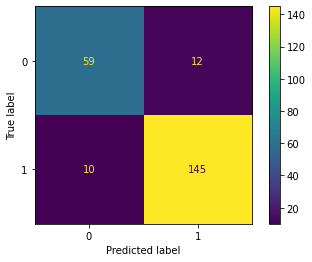

In [9]:
# Write your code here

hard_ham_paths = os.listdir("./hard_ham/")

# Same procedure as previous task but this time we use "hard_ham" directory instead of "easy_ham"
hard_ham = [fetch_format(f"./hard_ham/{x}") for x in hard_ham_paths]
hard_hamlabels = [0 for x in hard_ham_paths]

df_hard_ham = pd.DataFrame(list(zip(hard_ham, hard_hamlabels)), columns=["content", "label"])

df = df_hard_ham.append(df_spam)

df = df.sample(frac=1).reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(df["content"], df["label"], test_size=0.3)


nb = MultinomialNB()

vectorizer = CountVectorizer()
vX_train = vectorizer.fit_transform(X_train)
vX_test = vectorizer.transform(X_test)

nb.fit(vX_train.toarray(), y_train)
y_pred = nb.predict(vX_test.toarray())
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

cm = confusion_matrix(y_test, y_pred)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp_cm.plot()

Accuracy: 0.8893805309734514


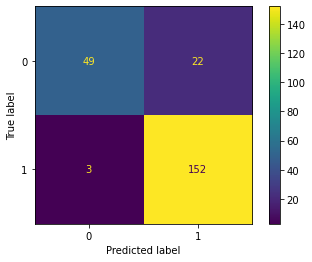

In [10]:
nb = BernoulliNB()

vectorizer = CountVectorizer()
vX_train = vectorizer.fit_transform(X_train)
vX_test = vectorizer.transform(X_test)

nb.fit(vX_train.toarray(), y_train)
y_pred = nb.predict(vX_test.toarray())
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

cm = confusion_matrix(y_test, y_pred)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp_cm.plot()

Answer 3.1:

The accuracy decreases for both MultinomialNB and BernoulliNB when using the "hard_ham" path. This is reasonable since these emails are harder to differentiate (more similar content to spam emails). The decrease in accuracy can also be seen in the confusion matrices. This time MNB was able to classify less spam mails correctly than BNB. But again, MNB classified more true negatives, i.e. ham mails correctly. This time BNB classified a lot less false negatives than MNB, that is spam classified as ham. But as mentioned before, it's most important to not have many false positives as we don't want ham mails to be classified as spam. While MNB have some false positives, it's still less than BNB. From this we draw the conslusion that while MNB has less true positives, it's still the better choice here too since we want to avoid ham mails classified as spam.

### 3.2 Retrain
Retrain new Multinomial and Bernolli Naive Bayes classifers on the combined (easy+hard) ham and spam. Now evaluate on spam versus hard-ham as in 3.1. Also evaluate on spam versus easy-ham. Compare the performance with question 2 and 3.1. What do you observe?

Accuracy: 0.9757820383451059


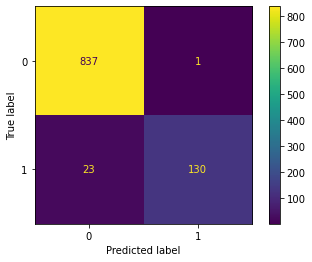

In [11]:
# Write your code here

# Create big datafram with "easy_ham", "hard_ham" and "spam"
df = df_ham.append([df_hard_ham, df_spam])

df = df.sample(frac=1).reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(df["content"], df["label"], test_size=0.3)

nb = MultinomialNB()

vectorizer = CountVectorizer()
vX_train = vectorizer.fit_transform(X_train)
vX_test = vectorizer.transform(X_test)

nb.fit(vX_train.toarray(), y_train)
y_pred = nb.predict(vX_test.toarray())
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

cm = confusion_matrix(y_test, y_pred)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp_cm.plot()

Accuracy: 0.8708375378405651


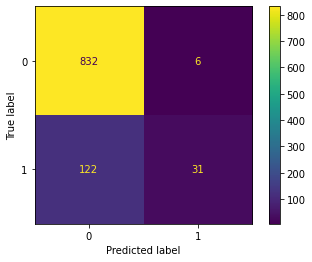

In [12]:
nb = BernoulliNB()

vectorizer = CountVectorizer()
vX_train = vectorizer.fit_transform(X_train)
vX_test = vectorizer.transform(X_test)

nb.fit(vX_train.toarray(), y_train)
y_pred = nb.predict(vX_test.toarray())
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

cm = confusion_matrix(y_test, y_pred)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp_cm.plot()

Answer 3.2:

The accuracy is somewhat similar to that of exercise 2.1, this may be due to the larger training dataset compared to excercise 2.1 and 3.1. MultinomialNB even increased a bit compared to exercise 2.1 and scored the highest accuracy when combining easy and hard spam and ham.

This time BNB has a lot of false positives, spam classified as ham, while not getting many true positives. We saw that this behaviour existed when only running the easy_ham on BNB too. In all regards, MNB performs better when looking at the confusion matrix here. 

### 3.3 Further improvements
Do you have any suggestions for how performance could be further improved? You don't have to implement them, just present your ideas.

Answer 3.3:

- One could filter the emails better. In some emails data such as date and URLs are included in the content and word counts may be scewed which effects the performance of the classification.

- The increasing the size of the dataset can increase the accuracy as seen in exercise 3.2.

- Changing parameters such as alpha for the model can have an impact on the classifiaction accuracy.

